<a href="https://colab.research.google.com/github/Ferstuque/DeepLearning/blob/main/Reducao_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

Saving clive_rosfield.jpeg to clive_rosfield.jpeg
Imagem 'clive_rosfield.jpeg' carregada com sucesso!


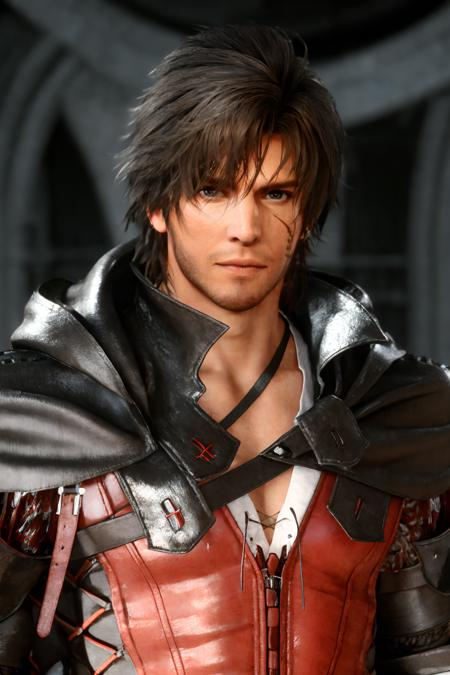

In [19]:
# Espera pelo upload de uma iamgem
uploaded = files.upload()

# Itera pelos arquivos upados (embora deva ter apenas um por vez)
for filename in uploaded:
  file = filename # Armazena o nome do arquivo na variável 'file'

  try:
    # Tenta ler a imagem
    img = cv2.imdecode(np.frombuffer(uploaded[file], np.uint8), cv2.IMREAD_COLOR)
    if img is not None:
        print(f"Imagem '{file}' carregada com sucesso!")
        cv2_imshow(img)
    else:
        print(f"Erro ao carregar a imagem '{file}'. Formato de imagem inválido ou arquivo corrompido.")
  except Exception as e:
    print(f"Erro ao processar o arquivo '{file}': {e}")

  break # Sai do loop após o primeiro arquivo (já que só é esperado um)

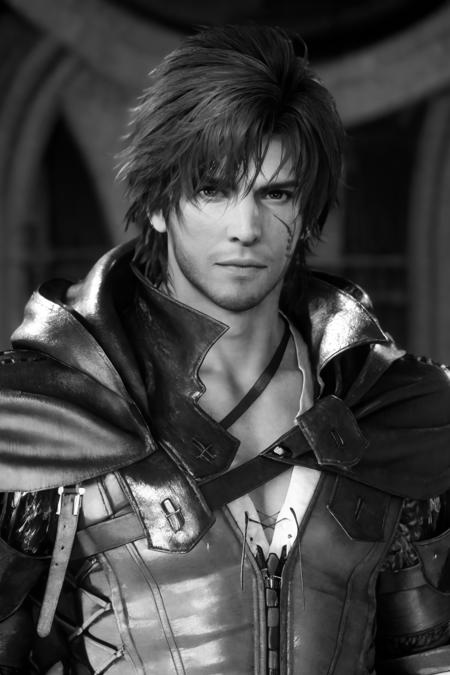

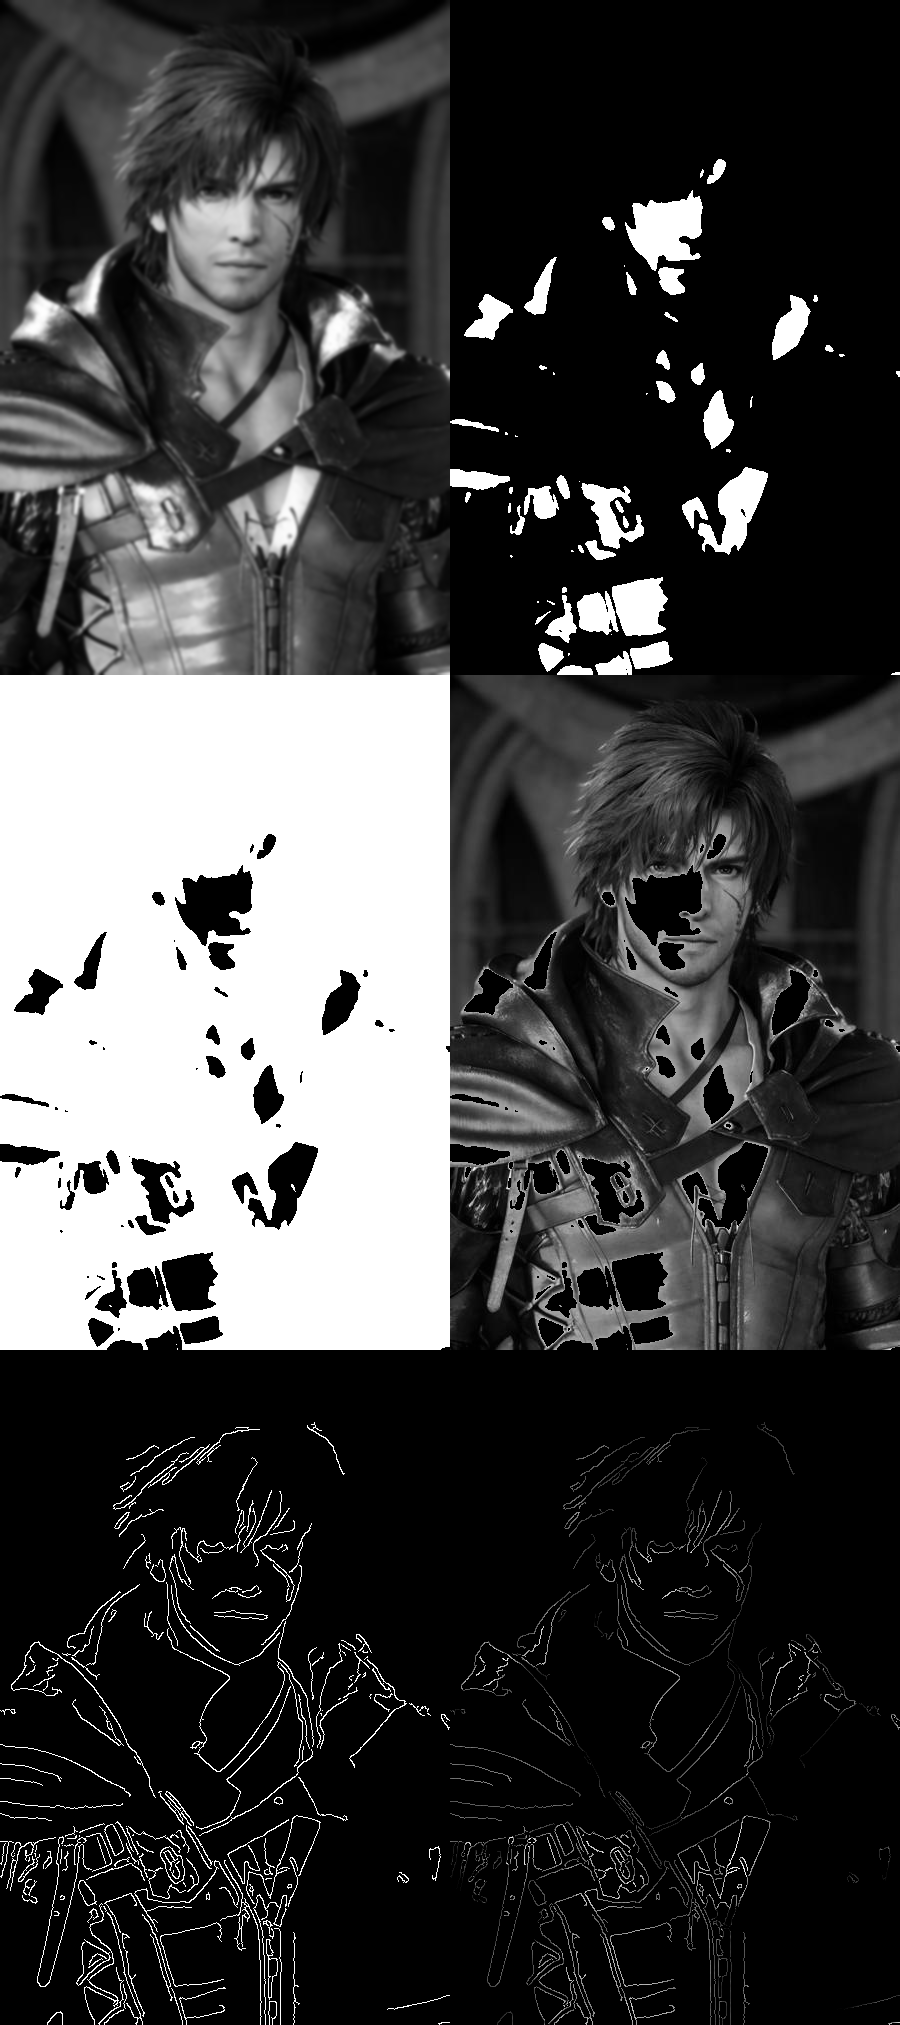

In [20]:
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Em cinza
blur = cv2.GaussianBlur(img, (7, 7), 0) # Em Blur
canny = cv2.Canny(blur, 10, 150) # Aplica contornos
(T, bin) = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY) # Aplica binário (fundo preto)
(T, binInv) = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY_INV) # Binário invertido (fundo branco)

resultado = np.vstack(
    [
        np.hstack([blur, bin]),
        np.hstack([binInv, cv2.bitwise_and(img, img, mask=binInv)]),
        np.hstack([canny, cv2.bitwise_and(img, img, mask=canny)])
    ]
)

cv2_imshow(img)
cv2_imshow(resultado)